In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('freelance_platform_projects.csv')

In [3]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Go through wordpress site to improve speed,Technology & Programming,Entry ($),Website Development,GBP,30.0,remote,ALL,fixed_price,2023-04-09 02:56:08,Need someone to go through Wordpress website (...,1 day or less,2022-11-18,Brisbane,Australia,USD,NaN
1,design concept for commercial building,Design,Entry ($),Interior/Exterior Design,USD,100.0,remote,ALL,fixed_price,2023-04-09 02:56:08,"design concept for commercial building , groun...",NaN,2010-09-03,Caracas,Venezuela,USD,NaN
2,SSH access to my server & PLESK,Technology & Programming,Entry ($),Website Development,EUR,15.0,remote,ALL,fixed_price,2023-04-09 02:04:45,I need to delete some backup files from the me...,NaN,2023-03-11,London,United Kingdom,GBP,NaN
3,Interiors Design blog writting,Writing & Translation,Intermediate ($$),Technical Writing,GBP,25.0,remote,ALL,hourly,2023-04-09 02:08:11,Hello! I'm looking for an experienced writer t...,NaN,2023-04-09,London,United Kingdom,GBP,NaN
4,Boost website seo,Digital Marketing,Intermediate ($$),SEO,GBP,30.0,remote,ALL,hourly,2023-04-09 02:08:11,I am getting ready to launch my bi weekly blog...,NaN,2023-04-09,London,United Kingdom,GBP,NaN


In [12]:
# Drop unnecessary columns
df = df.drop(['Duration', 'Client Job Title'], axis=1)

C:\Users\satya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


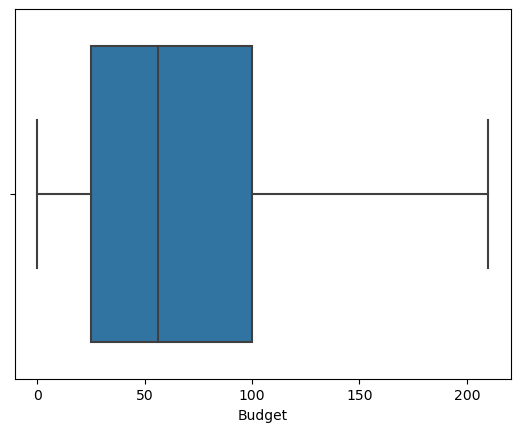

In [15]:
# eliminate the outliers in Budget column
outliers=np.where(df['Budget']>210)[0]
df= df.drop(outliers, axis=0)
sns.boxplot(df['Budget'])
plt.show()

In [16]:
df['Category Name'].unique()

array([6, 1, 8, 2, 5, 4, 7, 0, 3])

In [17]:
le = LabelEncoder()
df['Category Name'] = le.fit_transform(df['Category Name'])
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,Go through wordpress site to improve speed,6,Entry ($),Website Development,GBP,30.0,remote,ALL,fixed_price,2023-04-09 02:56:08,Need someone to go through Wordpress website (...,2022-11-18,Brisbane,Australia,USD
1,design concept for commercial building,1,Entry ($),Interior/Exterior Design,USD,100.0,remote,ALL,fixed_price,2023-04-09 02:56:08,"design concept for commercial building , groun...",2010-09-03,Caracas,Venezuela,USD
2,SSH access to my server & PLESK,6,Entry ($),Website Development,EUR,15.0,remote,ALL,fixed_price,2023-04-09 02:04:45,I need to delete some backup files from the me...,2023-03-11,London,United Kingdom,GBP
3,Interiors Design blog writting,8,Intermediate ($$),Technical Writing,GBP,25.0,remote,ALL,hourly,2023-04-09 02:08:11,Hello! I'm looking for an experienced writer t...,2023-04-09,London,United Kingdom,GBP
4,Boost website seo,2,Intermediate ($$),SEO,GBP,30.0,remote,ALL,hourly,2023-04-09 02:08:11,I am getting ready to launch my bi weekly blog...,2023-04-09,London,United Kingdom,GBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9810,Published Travel Writer required for content c...,8,Entry ($),Content Writing,GBP,50.0,remote,ALL,fixed_price,2023-01-18 19:23:01,I am looking for a published travel writer to ...,2011-06-06,Amsterdam,Netherlands,GBP
9811,Shopify - Filtering Work (Product Selection/No...,1,Intermediate ($$),Web Design,GBP,65.0,remote_country,GB,fixed_price,2023-01-18 19:18:48,On our website www.juicebitz.co.uk we have add...,2022-03-23,Filey,United Kingdom,GBP
9812,Simple SQL Query,6,Entry ($),Data Science & Analysis,GBP,50.0,remote,ALL,fixed_price,2023-01-18 19:18:48,I need someone to write a quick SQL query on a...,2022-03-14,London,United Kingdom,GBP
9813,"Create a Carbon, Water, Waste Calculating plat...",1,Expert ($$$),Web Design,USD,39.0,remote,ALL,hourly,2023-01-18 19:18:47,I am seeking a full stack web developer who sp...,2013-07-21,Noida,India,USD


In [18]:
x=df.iloc[:,[1,5]].values
x[:5]

array([[  6.,  30.],
       [  1., 100.],
       [  6.,  15.],
       [  8.,  25.],
       [  2.,  30.]])

In [19]:
# use elbow method to define K
from sklearn.cluster import KMeans
wcss={}
for i in range(1,11):
    model= KMeans(n_clusters=i)
    model.fit(x)
    wcss[i] = model.inertia_
wcss

{1: 21809866.72510509,
 2: 6924167.591825388,
 3: 2504422.3110066717,
 4: 1484343.212539082,
 5: 869973.8772027503,
 6: 609652.8049131039,
 7: 451060.16069284687,
 8: 346656.8683882921,
 9: 282657.5170555115,
 10: 235521.54795517778}

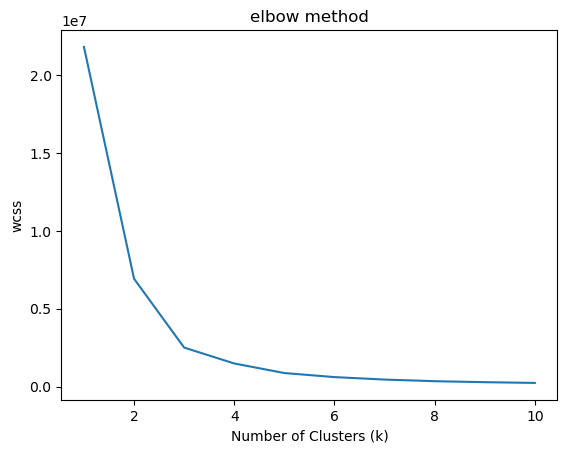

In [20]:
plt.plot(wcss.keys(),wcss.values())
plt.title('elbow method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('wcss')
plt.show()

In [21]:
# reading the graph the optimal  no of cluster is 3
model=KMeans(n_clusters=3)
pred=model.fit_predict(x)
pred[:100]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1,
       2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1])

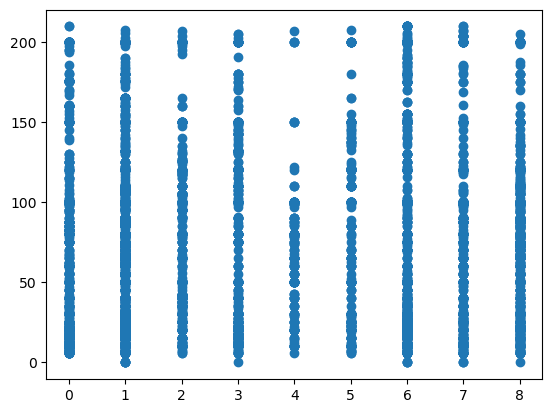

In [22]:
plt.scatter(x[:,0],x[:,1])
plt.show()